In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import gmaps
import os

In [2]:
# File to Load:
file_to_load='kc_house_data.csv' 

# Read kc_house_data csv file and store into data frame:
kc_house_data_df=pd.read_csv(file_to_load)
kc_house_data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Columns to display
house_data_df = kc_house_data_df[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 
                                  'waterfront', 'yr_built', 'zipcode', 'lat', 'long']]

# Formatting
#house_data_df.style.format({"price": "${:,.2f}", "bathrooms":"{:.2f}"})

house_data_df.head()

,id,price,bedrooms,bathrooms,sqft_living,waterfront,yr_built,zipcode,lat,long
0,7129300520,221900.0,3,1.00,1180,0,1955,98178,47.5112,-122.257
1,6414100192,538000.0,3,2.25,2570,0,1951,98125,47.7210,-122.319
2,5631500400,180000.0,2,1.00,770,0,1933,98028,47.7379,-122.233
3,2487200875,604000.0,4,3.00,1960,0,1965,98136,47.5208,-122.393
4,1954400510,510000.0,3,2.00,1680,0,1987,98074,47.6168,-122.045


In [4]:
house_data_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,waterfront,yr_built,zipcode,lat,long
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,0.007542,1971.005136,98077.939805,47.560053,-122.213896
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,0.086517,29.373411,53.505026,0.138564,0.140828
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,0.000000,1951.000000,98033.000000,47.471000,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,0.000000,1975.000000,98065.000000,47.571800,-122.230000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,0.000000,1997.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.000000,2015.000000,98199.000000,47.777600,-121.315000


In [5]:
house_data_df.dtypes

id               int64
price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
waterfront       int64
yr_built         int64
zipcode          int64
lat            float64
long           float64
dtype: object

The r-squared is: 0.7020437212325269


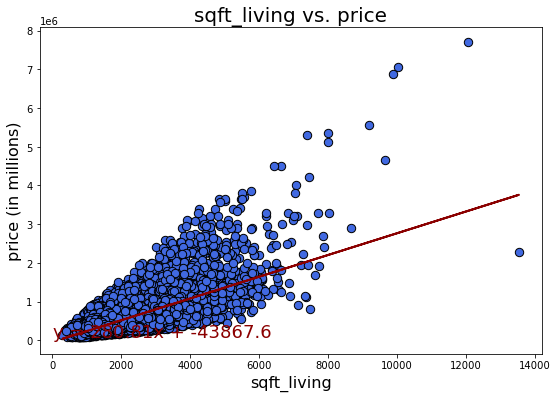

In [6]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = house_data_df['sqft_living']
y_values = house_data_df['price']

# Perform a linear regression on sqft_living vs. price:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('sqft_living vs. price', fontsize=20)
plt.ylabel('price (in millions)', fontsize=16, color='black')
plt.xlabel('sqft_living', fontsize=16, color='black')
plt.annotate(line_eq,(15,8.000000e+04), fontsize=18, color='darkred')

# Print r-squared value:
print(f'The r-squared is: {rvalue}')

# Save the figure:
plt.savefig('output_data/Square Footage vs. Price.png')

# Show plot:
plt.show()

In [39]:
# Return homes over 6,000 squarefeet with a waterfront view
sixk_sqft_with_waterfront_df = house_data_df[(house_data_df.sqft_living > 6000) & (house_data_df.waterfront == 1)]
sixk_sqft_with_waterfront_df.head()

,id,price,bedrooms,bathrooms,sqft_living,waterfront,yr_built,zipcode,lat,long
1164,1247600105,5110000.0,5,5.25,8010,1,1999,98033,47.6767,-122.211
1315,7558700030,5300000.0,6,6.00,7390,1,1991,98040,47.5631,-122.210
2444,7524900003,3280000.0,2,1.75,6840,1,2001,98008,47.6042,-122.112
2626,7738500731,4500000.0,5,5.50,6640,1,2004,98155,47.7493,-122.280
3914,9808700762,7060000.0,5,4.50,10040,1,1940,98004,47.6500,-122.214


In [40]:
# Return homes over 6,000 squarefeet without a waterfront view
sixk_sqft_without_waterfront_df = house_data_df[(house_data_df.sqft_living > 6000) & (house_data_df.waterfront == 0)]
sixk_sqft_without_waterfront_df.head()

,id,price,bedrooms,bathrooms,sqft_living,waterfront,yr_built,zipcode,lat,long
419,8678500060,1550000.0,5,4.25,6070,0,1999,98024,47.5954,-121.950
527,3225079035,1600000.0,6,5.00,6050,0,2001,98024,47.6033,-121.943
577,1526069135,930000.0,4,4.00,6050,0,2009,98077,47.7466,-122.029
1100,7237500390,1570000.0,5,4.50,6070,0,2004,98059,47.5306,-122.134
1448,8907500070,5350000.0,5,5.00,8000,0,2009,98004,47.6232,-122.220


In [42]:
# Return average price of homes over 6,000 squarefeet with a waterfront
sixk_sqft_with_waterfront_df["price"].mean()

4552500.0

In [43]:
# Return average price of homes over 6,000 squarefeet without a waterfront
sixk_sqft_without_waterfront_df["price"].mean()

2425000.0

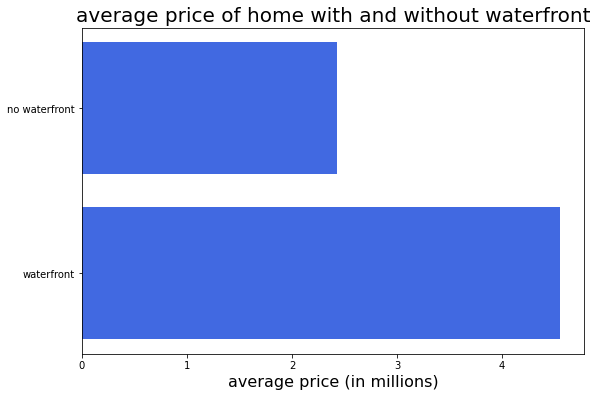

In [54]:
# Build bar plot for homes larger than 6,000 sqft vs. price with waterfront

# List variables
yvariablelist = [sixk_sqft_with_waterfront_df["price"].mean()/1000000, sixk_sqft_without_waterfront_df["price"].mean()/1000000]
xvariablelist = ["waterfront","no waterfront"]

# Set figure size
plt.figure(figsize=(9,6))
plt.barh(xvariablelist, yvariablelist, color="royalblue")

# Set title and labels
plt.title("average price of home with and without waterfront", fontsize=20, color='black')
plt.xlabel("average price (in millions)", fontsize=16, color='black')

# Save and display graph
plt.show()

In [ ]:
# Return homes over 6,000 squarefeet without a waterfront view
sixk_sqft_no_waterfront = house_data_df[(house_data_df.sqft_living > 6000) & (house_data_df.waterfront == 1)
sixk_sqft_no_waterfront.head()

In [ ]:
# Build scatter plot for homes larger than 6,000 sqft without a waterfront vs. price:
plt.figure(figsize=(9,6))
x_values = house_data_df['sixk_sqft_no_waterfront']
y_values = house_data_df['price']

# Perform a linear regression on sqft_living vs. price:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('sqft_living_over_6000_without_waterfront vs. price', fontsize=20)
plt.ylabel('price (in millions)', fontsize=16, color='black')
plt.xlabel('sqft_living_over_6000', fontsize=16, color='black')
plt.annotate(line_eq,(15,8.000000e+04), fontsize=18, color='darkred')

# Print r-squared value:
print(f'The r-squared is: {rvalue}')

# Save the figure:
plt.savefig('output_data/Square Footage Over 6,000 without Waterfront vs. Price.png')

# Show plot:
plt.show()